# TUTORIAL BAYES OPTIMIZATION

import the libraries

In [1]:
import numpy as np
import scipy
from matplotlib import pyplot as plt

## Define the objective function 

In [2]:
def obj(x, noise = 0.1):
    sigma = np.random.normal(0,noise) # gaussian noise
    det = (x**2 * np.sin(5 * np.pi * x)**6.0) 
    return det + sigma # deterministic function plus noise

prepare the initial dataset, like the measurement that we have

Optima: x=0.894, y=0.780


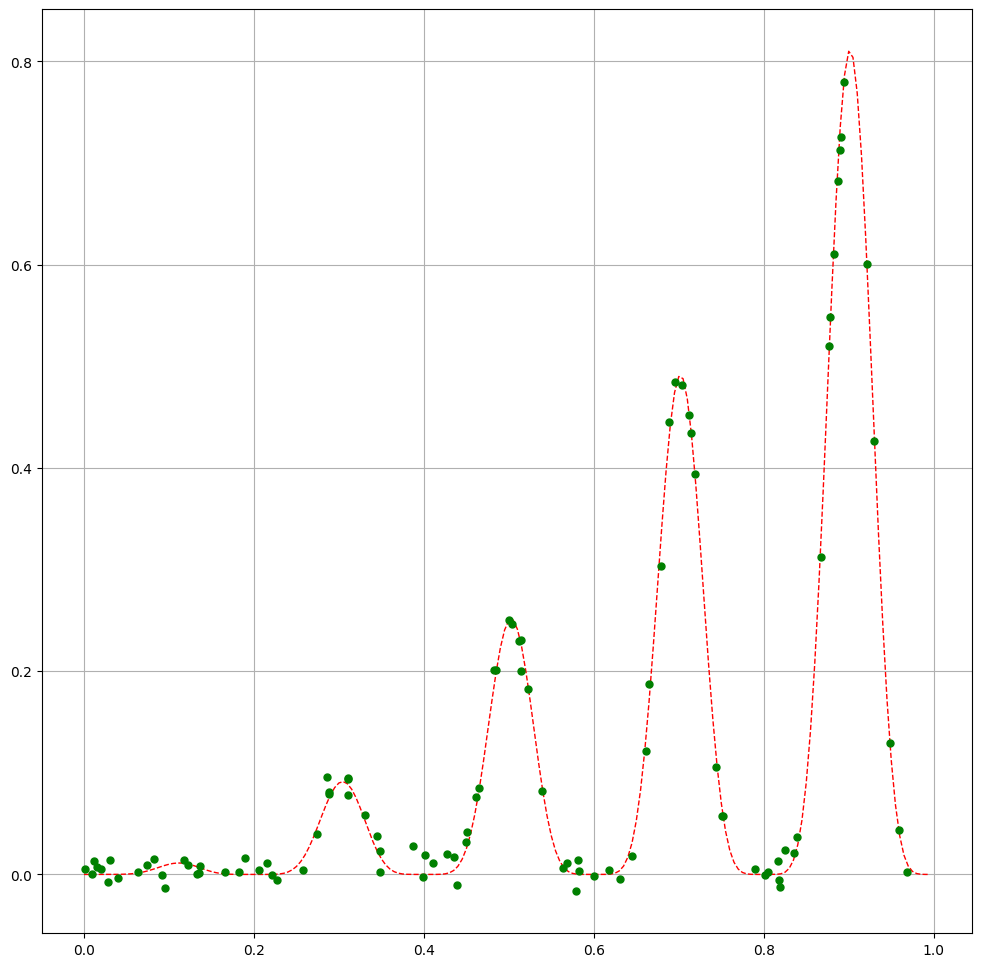

In [7]:
X = np.arange(0,1,0.005) # first rough dataset
X1 = np.sort(np.random.uniform(0,1,100)) # a different sampling
Y = [obj(x,0) for x in X] ; Y1 = [obj(x, 0.01) for x in X1]

plt.figure(1, (12,12))
plt.grid()
plt.errorbar(X, Y, marker = '', color = 'red',linestyle = '--', markersize = 2, linewidth = 1)
plt.errorbar(X1, Y1, marker = '.', color = 'green',linestyle = '', markersize = 10, linewidth = 0.5)

ix = np.argmax(Y1)
print('Optima: x=%.3f, y=%.3f' % (X1[ix], Y1[ix]))

In [4]:
#print(X1)
#print(X1.reshape(-1,1))

In [5]:
# Load the GP regressor
from sklearn.gaussian_process import GaussianProcessRegressor
import warnings

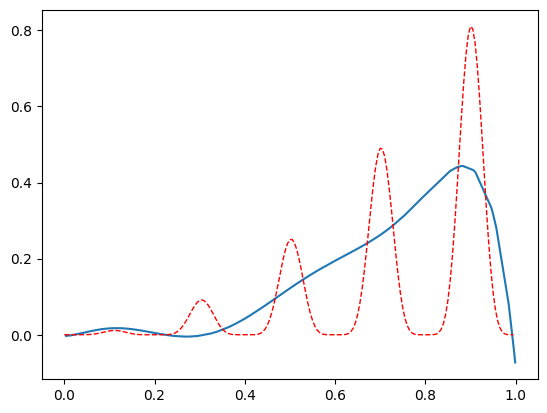

In [6]:
model = GaussianProcessRegressor()
model.fit(X1.reshape(-1,1),Y1)

def surrogate(model, X):
    with warnings.catch_warnings():
        warnings.simplefilter("ignore")
    return model.predict(X.reshape(-1,1), return_std = True)

plt.errorbar(X, Y, marker = '', color = 'red',linestyle = '--', markersize = 2, linewidth = 1)
Ypred, _ = surrogate(model,X1)
plt.plot(X1,Ypred)